In [8]:
## Import Libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("max_colwidth", None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
'''
function name: parse_df_columns

purpose: parsing the last aggregate column of the gtf/gff3 into useful columns and cleaning non-relevant columns

input: dataframe containining "raw" gtf/gff

output: dataframe containing gtf with useful columns ["gene_id", "transcript_id", etc...]
'''

def parse_df_columns(df, is_ref=True):

    if is_ref:

        ## Get gene ids
        df["gene_id"] = df["other"].str.split("source_gene=", expand=True)[1].str.split(';', expand=True)[0]
        
        ## Get gene names
        df["gene_name"] = df["other"].str.split("source_gene_common_name=", expand=True)[1].str.split(';', expand=True)[0]
        
        ## Only keep relevant
        df = df[["chr", "gene_id", "gene_name"]].copy()

        ## Drop duplicates
        df.drop_duplicates(inplace=True)
        

    else:

        ## Get CHM gene ids
        df["gene_id"] = df["other"].str.split('";', expand=True)[0].str.extract("([^ \"]*$)", expand=True)

        ## Drop "other" column
        df = df[["chr", "gene_id"]].copy()
        
    for col in df.columns:
        df.loc[df[col].isnull(), col] = np.NaN
        

    return df

In [10]:
'''
function name: calculate_cpm

purpose: Calculate CPM for the each sample given

input: Counts dataset

output: Counts dataset with CPM columns as well
'''

def calculate_cpm(df):

    ## Loop through counts columns to calculate CPM and add to the dataframe
    for col in ["total_counts"]:
        
        df[col] = df[col]
        cpm_name = "average_CPM"
        df[cpm_name] = ((df[col]/(df[col].sum())) * 1000000)
    
    return df 

In [11]:
## Import transcripts
df_transcripts = pd.read_csv("../../../data/bernardo/raw/uky_aged_stringent/bambu_discovery/counts_transcript.txt",
        sep="\t", low_memory=False, header=0)

In [12]:
## Import Genes
df_genes = pd.read_csv("../../../data/bernardo/raw/uky_aged_stringent/bambu_discovery/counts_gene.txt",
        sep="\t", low_memory=False, header=0)

In [7]:
## Get total counts for genes and transcripts
df_genes["total_counts"] = df_genes[df_genes.columns[1:]].sum(axis=1)
df_transcripts["total_counts"] = df_transcripts[df_transcripts.columns[2:]].sum(axis=1)

In [34]:
## Get average counts for genes and transcripts
df_genes["average_counts"] = df_genes["total_counts"]/4
df_transcripts["average_counts"] = df_transcripts["total_counts"]/4

In [35]:
## Only keep genes and transcripts with more than 0 counts
df_genes = df_genes.loc[df_genes["total_counts"] > 0].copy()
df_transcripts = df_transcripts.loc[df_transcripts["total_counts"] > 0].copy()

In [36]:
## Calculate percentile
df_genes['percentile'] = df_genes["total_counts"].rank(pct=True)

In [37]:
## Calculate Rank
df_genes['rank'] = df_genes["total_counts"].rank(ascending=False)

In [38]:
## See rank for  PIEZO1P1 
## Respectively: ENSG00000233686
df_genes.loc[df_genes.index.str.contains("ENSG00000142192")]

,cshl_356_uky_mapped_filtered_sorted,cshl_1291_uky_mapped_filtered_sorted,cshl_1304_uky_mapped_filtered_sorted,cshl_1271_uky_mapped_filtered_sorted,total_counts,average_counts,percentile,rank
ENSG00000142192,44627,30588,52703,70702,153993,38498.25,0.996161,199.0


In [39]:
## Get total counts for all genes with more than 0 counts
total_counts = df_genes["total_counts"]

In [40]:
## Get log total counts
log_total_counts = np.log10(df_genes["total_counts"])

In [41]:
## Print APP Log10 Expression of total counts
print("APP Log Expression:", log_total_counts["ENSG00000142192"])

app_log10_counts = log_total_counts["ENSG00000142192"]

APP Log Expression: 5.1875009797295295


In [42]:
## Print log10 of 5
np.log10(5)

0.6989700043360189

In [43]:
## Use ggplot colors
ggplot2_colors = ["#F8766D", "#CD9600", "#7CAE00", "#00BE67", "#00BFC4", "#00A9FF", "#C77CFF", "#FF61CC"]

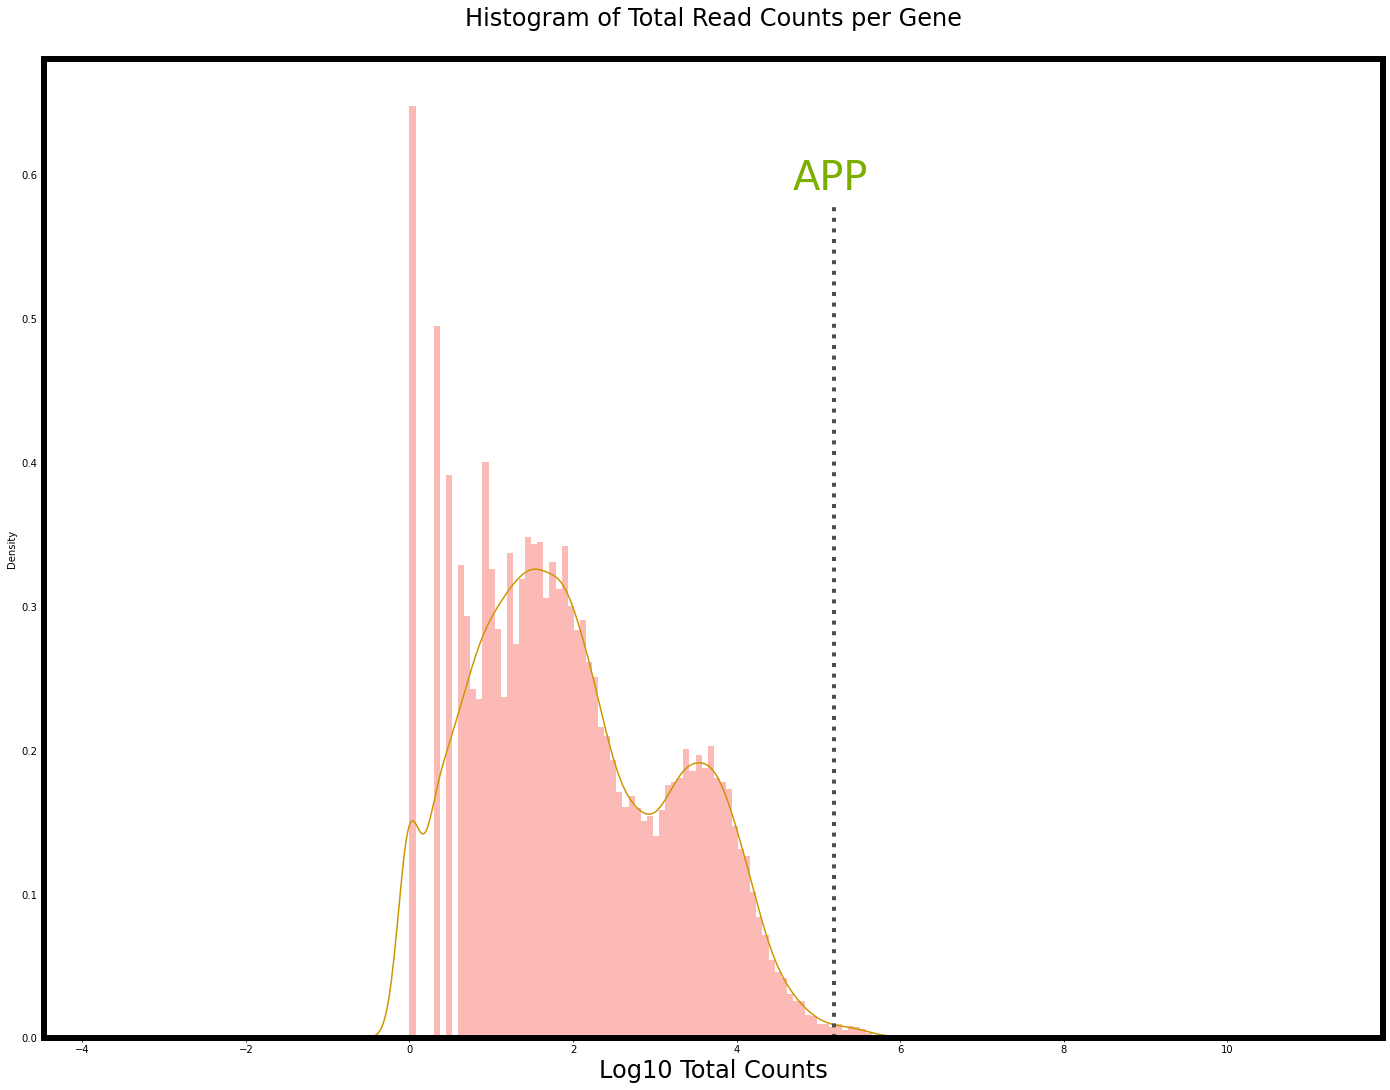

In [44]:
## Create log plot for total counts and APP

## Set parameters for figures
from matplotlib import rcParams



fig, ax = plt.subplots(figsize = (24,18))
rcParams.update({'font.size': 24})
rcParams['axes.linewidth'] = 6


log_total_counts.plot(kind = "hist", density = True, bins = 100, color="#F8766D", alpha=0.5) # change density to true, because KDE uses density


log_total_counts.plot(kind = "kde", color="#CD9600", alpha=1)

ax.set_xlabel("Log10 Total Counts", size=24)


ax.set_title("Histogram of Total Read Counts per Gene\n", size=24)

ax.axvline(app_log10_counts, alpha=1, ymax = 0.85, linestyle = ":", color="#4d4d4d", linewidth=4)

ax.text(app_log10_counts - 0.5, 0.59, "APP", size = 40, alpha = 1, color="#7CAE00")

plt.savefig('../../../figures/bernardo/01.exploratory_analysis/app_density_plot_log10_counts.svg',
            dpi=300, transparent=True, bbox_inches="tight")

plt.savefig('../../../figures/bernardo/01.exploratory_analysis/app_density_plot_log10_counts.png',
            dpi=300, transparent=True, bbox_inches="tight")


plt.show()

In [45]:
df_genes_cpm = calculate_cpm(df_genes)

In [46]:
df_genes_cpm.head()

,cshl_356_uky_mapped_filtered_sorted,cshl_1291_uky_mapped_filtered_sorted,cshl_1304_uky_mapped_filtered_sorted,cshl_1271_uky_mapped_filtered_sorted,total_counts,average_counts,percentile,rank,average_CPM
ENSG00000000003,476,660,969,868,2497,624.25,0.823485,9106.0,9.571391
ENSG00000000005,16,20,31,23,74,18.50,0.508656,25345.5,0.283654
ENSG00000000419,2930,2061,4146,6086,12293,3073.25,0.946163,2778.0,47.120990
ENSG00000000457,549,377,700,420,1497,374.25,0.782986,11195.0,5.738235
ENSG00000000460,158,109,227,157,493,123.25,0.707446,15091.5,1.889746


In [47]:
## Get total counts for all genes with more than 0 counts
total_cpm = df_genes_cpm["average_CPM"]

In [48]:
## Get log total counts
log_total_cpm = np.log10(df_genes_cpm["average_CPM"])

In [49]:
print("APP Log Expression:", log_total_cpm["ENSG00000142192"])

APP Log Expression: 2.7710575020733


In [50]:
df_genes_cpm.loc[df_genes_cpm.index == "ENSG00000142192"]

,cshl_356_uky_mapped_filtered_sorted,cshl_1291_uky_mapped_filtered_sorted,cshl_1304_uky_mapped_filtered_sorted,cshl_1271_uky_mapped_filtered_sorted,total_counts,average_counts,percentile,rank,average_CPM
ENSG00000142192,44627,30588,52703,70702,153993,38498.25,0.996161,199.0,590.27923


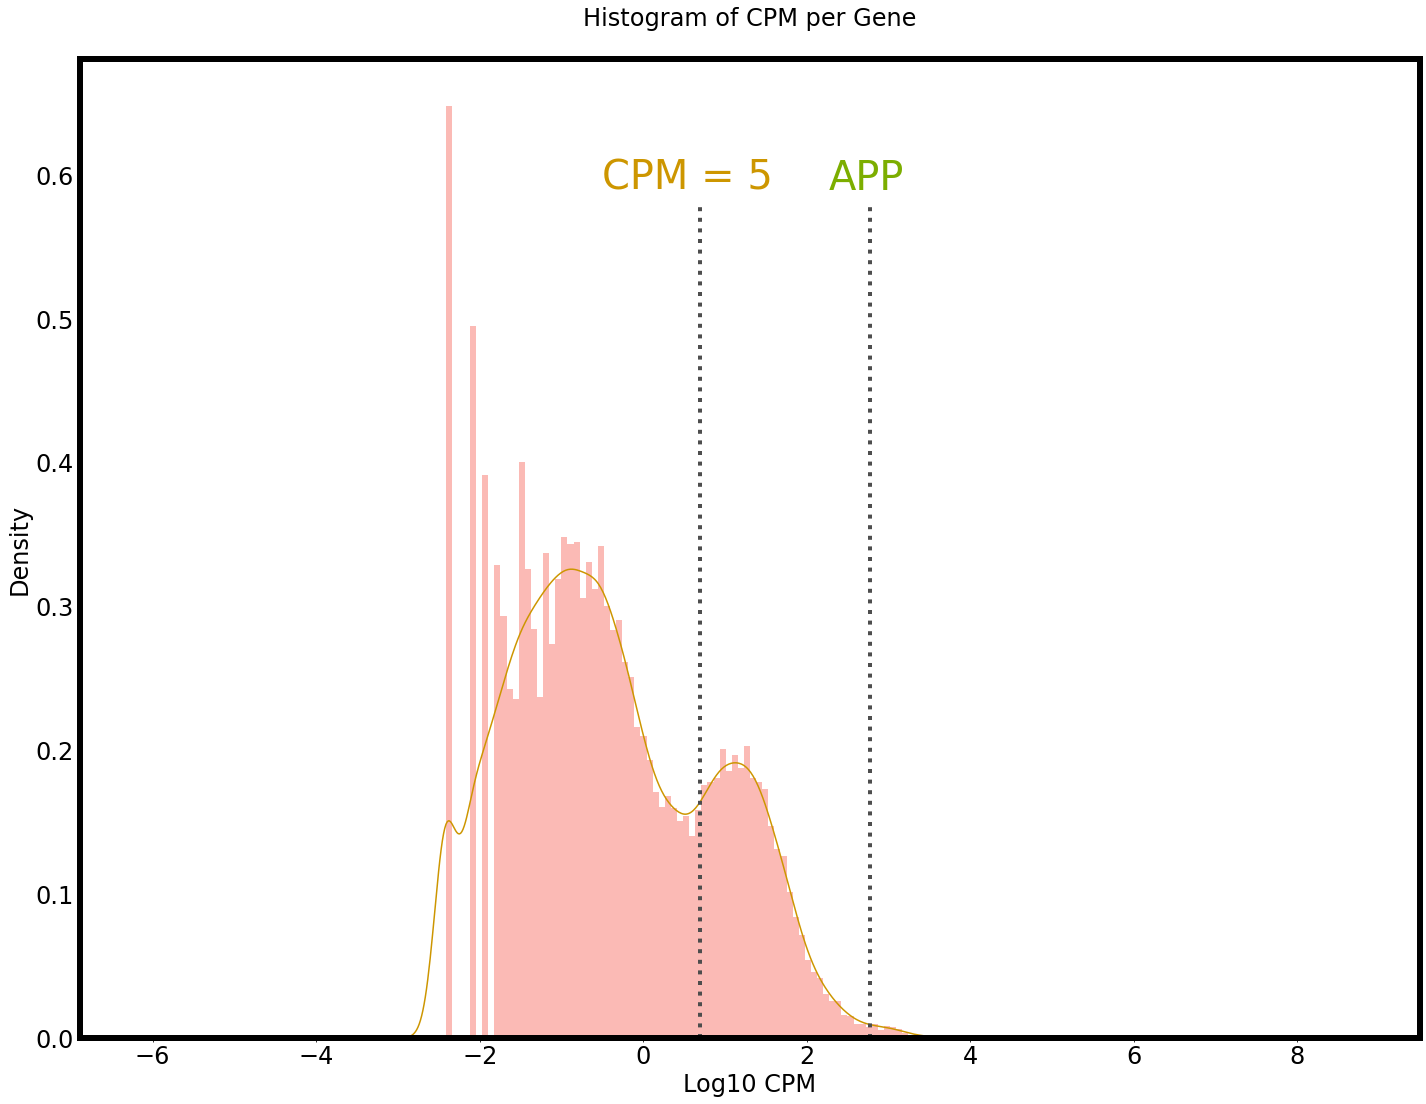

In [51]:
## Create log plot
## Set parameters for figures
from matplotlib import rcParams



fig, ax = plt.subplots(figsize = (24,18))
rcParams.update({'font.size': 24})
rcParams['axes.linewidth'] = 6


log_total_cpm.plot(kind = "hist", density = True, bins = 100, color="#F8766D", alpha=0.5) # change density to true, because KDE uses density


log_total_cpm.plot(kind = "kde", color="#CD9600", alpha=1)

ax.set_xlabel("Log10 CPM", size=24)


ax.set_title("Histogram of CPM per Gene\n", size=24)

ax.axvline(2.77, alpha=1, ymax = 0.85, linestyle = ":", color="#4d4d4d", linewidth=4)
ax.axvline(0.698, alpha=1, ymax = 0.85, linestyle = ":", color="#4d4d4d", linewidth=4)



ax.text(2.77 - 0.5, 0.59, "APP", size = 40, alpha = 1, color="#7CAE00")
ax.text(0.698 - 1.2, 0.59, "CPM = 5", size = 40, alpha = 1, color="#CD9600")

plt.savefig('../../../figures/bernardo/01.exploratory_analysis/app_density_plot_log10_cpm.svg',
            dpi=300, transparent=True, bbox_inches="tight")

plt.savefig('../../../figures/bernardo/01.exploratory_analysis/app_density_plot_log10_cpm.png',
            dpi=300, transparent=True, bbox_inches="tight")

plt.show()

In [52]:
## Fix transcripts column names
df_transcripts.columns = ["TXNAME", "GENEID", "356_counts", "1291_counts", "1304_counts", "1271_counts",
                          "total_counts", "average_counts"]

In [53]:
## Calculate CPM for transcripts
df_t_cpm = calculate_cpm(df_transcripts)

In [54]:
## Look at APP transcript expression
print("APP")
df_t_cpm.loc[df_t_cpm["GENEID"].str.contains("ENSG00000142192")].sort_values(by="average_CPM", ascending=False)

APP


,TXNAME,GENEID,356_counts,1291_counts,1304_counts,1271_counts,total_counts,average_counts,average_CPM
16236,ENST00000354192,ENSG00000142192,19859.104151,11109.881118,23491.906467,34655.886327,89116.778063,22279.194516,266.469449
17452,ENST00000357903,ENSG00000142192,11802.259324,5783.116286,12077.137403,14560.111116,44222.624129,11055.656032,132.230749
15734,ENST00000348990,ENSG00000142192,11424.314802,1444.561104,15319.606131,14708.867195,42897.349233,10724.337308,128.268024
15501,ENST00000346798,ENSG00000142192,1012.041762,12137.617606,1426.630618,5378.329793,19954.619780,4988.654945,59.666616
18057,ENST00000359726,ENSG00000142192,264.765515,18.516682,196.815800,1147.965875,1628.063873,407.015968,4.868099
17797,ENST00000358918,ENSG00000142192,145.208372,52.326669,114.222532,132.927247,444.684819,111.171205,1.329659
56450,ENST00000439274,ENSG00000142192,38.336823,12.865057,33.891645,30.565856,115.659382,28.914845,0.345835
62392,ENST00000448850,ENSG00000142192,27.307044,2.028159,15.214822,9.078119,53.628145,13.407036,0.160354
94143,ENST00000491395,ENSG00000142192,0.000000,1.002825,0.000000,43.156687,44.159512,11.039878,0.132042
72968,ENST00000464867,ENSG00000142192,14.212139,22.609284,2.015314,5.106855,43.943592,10.985898,0.131396
